In [13]:
%pwd

'/Users/r/Documents/stud/ss24/finnpinn/src'

In [14]:
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
analytical_retardation_type = "langmuir"

In [16]:
base_dir = Path(f"../data_out/{analytical_retardation_type}/finn_increasing_time_epochs_100")

In [17]:
import common

df = {
    "retardation_file_paths": [],
    "num_time_steps": [],
    "num_epochs": [],
}
for finn_dir, ret_file_path in common.iter_final_retardation_files(base_dir, verbose=False):
    df["retardation_file_paths"].append(ret_file_path)
    df["num_time_steps"].append(int(finn_dir.name.split("_")[-1]))
    df["num_epochs"].append(int(ret_file_path.stem.split("_")[-1]))
df = pd.DataFrame(df).sort_values("num_time_steps").reset_index(drop=True)
df = df[df["num_time_steps"] < 13]
df = df[df["num_epochs"] >= 100].reset_index(drop=True)
df

,retardation_file_paths,num_time_steps,num_epochs
0,../data_out/langmuir/finn_increasing_time_epoc...,1,100
1,../data_out/langmuir/finn_increasing_time_epoc...,2,100
2,../data_out/langmuir/finn_increasing_time_epoc...,3,100
3,../data_out/langmuir/finn_increasing_time_epoc...,4,100
4,../data_out/langmuir/finn_increasing_time_epoc...,6,100
5,../data_out/langmuir/finn_increasing_time_epoc...,8,100
6,../data_out/langmuir/finn_increasing_time_epoc...,9,100
7,../data_out/langmuir/finn_increasing_time_epoc...,12,100


In [18]:
df.to_csv(f"../data_out/{analytical_retardation_type}/increasing_time_ret_files.csv")

In [19]:
df2 = df.copy()
df2["ret"] = df["retardation_file_paths"].apply(lambda p: np.load(p).ravel())
df2 = df2.explode('ret').reset_index(drop=True)
df2["u"] = np.tile(np.arange(0, 100), len(df))
df2

,retardation_file_paths,num_time_steps,num_epochs,ret,u
0,../data_out/langmuir/finn_increasing_time_epoc...,1,100,5.053799,0
1,../data_out/langmuir/finn_increasing_time_epoc...,1,100,4.989487,1
2,../data_out/langmuir/finn_increasing_time_epoc...,1,100,4.925657,2
3,../data_out/langmuir/finn_increasing_time_epoc...,1,100,4.862341,3
4,../data_out/langmuir/finn_increasing_time_epoc...,1,100,4.799571,4
...,...,...,...,...,...
795,../data_out/langmuir/finn_increasing_time_epoc...,12,100,2.340956,95
796,../data_out/langmuir/finn_increasing_time_epoc...,12,100,2.336242,96
797,../data_out/langmuir/finn_increasing_time_epoc...,12,100,2.331661,97
798,../data_out/langmuir/finn_increasing_time_epoc...,12,100,2.327209,98


In [20]:
df2.dtypes

retardation_file_paths    object
num_time_steps             int64
num_epochs                 int64
ret                       object
u                          int64
dtype: object

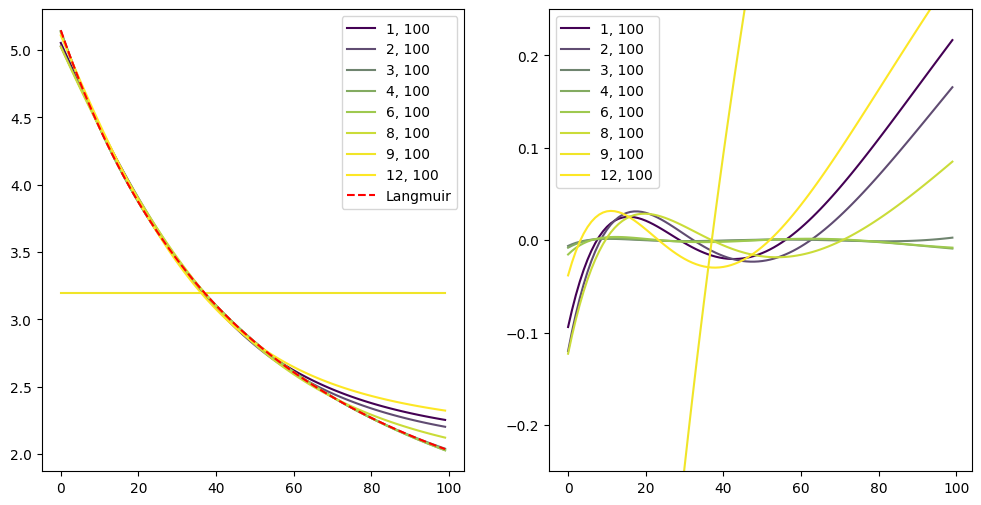

In [22]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))

analytical_ret = np.load(f"../data_out/{analytical_retardation_type}/default_finn/retardation_{analytical_retardation_type}.npy")

initial_colors = plt.cm.viridis(np.linspace(0, 1, len(df)))
final_color = initial_colors[-1]

# highest_time_step_ret = np.load(df["retardation_file_paths"].iloc[-1])
highest_time_step_ret = analytical_ret

for i, p in enumerate(df["retardation_file_paths"]):
    ret = np.load(p)
    mixed_color = initial_colors[i] * (1 - i / (len(df) - 1)) + final_color * (i / (len(df) - 1))
    ax1.plot(ret, label=f"{df['num_time_steps'][i]}, {df['num_epochs'][i]}", color=mixed_color)
    ax2.plot(ret-highest_time_step_ret, label=f"{df['num_time_steps'][i]}, {df['num_epochs'][i]}", color=mixed_color)
ax1.plot(analytical_ret, "r--", label=analytical_retardation_type.capitalize())#, color=final_color)
if analytical_retardation_type == "freundlich":
    ax1.set_ylim(3,5)
ax2.set_ylim(-.25,.25)
ax1.legend()
ax2.legend()
plt.show()